# Install packages

In [2]:
!pip install mlflow pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Import Library

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# MLflow for experiment tracking (make sure it's installed)
import mlflow
import mlflow.sklearn

# Sklearn: Preprocessing, modeling, evaluation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Optional: For exposing MLflow UI online
# Make sure to install it only if you're deploying locally and need tunneling
try:
    from pyngrok import ngrok
except ImportError:
    print("pyngrok is not installed. You can install it with: pip install pyngrok")


#Load Dataset

In [3]:
df = pd.read_csv("/content/heart.csv")  # Adjust path as needed
print(df.head())
print(df.info())
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

# Train-Test Split

In [4]:
X = df.drop('target', axis=1)
y = df['target']

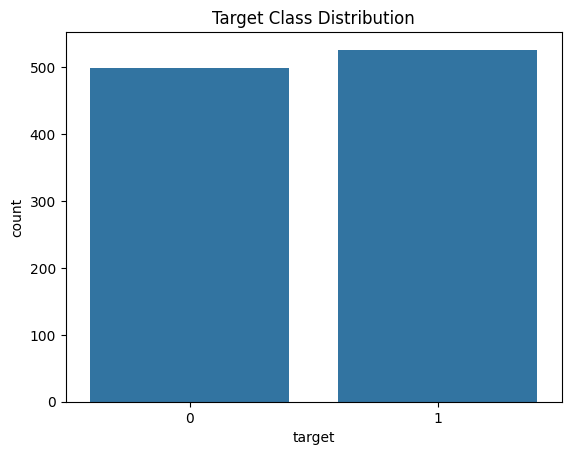

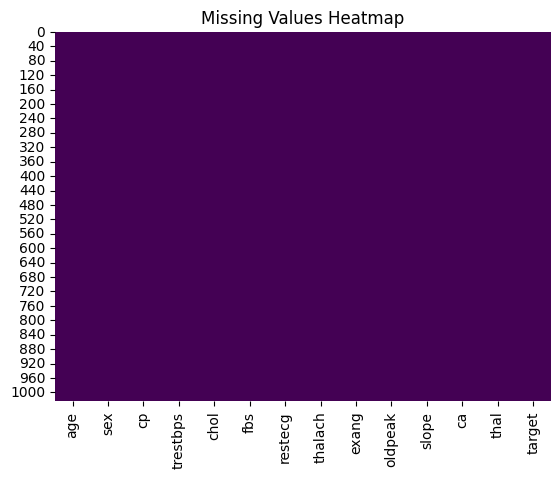

In [6]:
# Check class balance
sns.countplot(data=df, x='target')
plt.title("Target Class Distribution")
plt.show()

# Check for missing values visually
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [7]:
# List of potential categorical columns based on known UCI structure
categorical_features = ['cp', 'thal', 'slope', 'restecg', 'ca']
numeric_features = [col for col in df.columns if col not in categorical_features + ['target']]


In [8]:
# Numeric pipeline
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine them
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])


# Standard Scaling

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features for models like SVM, Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [10]:
results = {}

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, nb_pred),
    'precision': precision_score(y_test, nb_pred),
    'recall': recall_score(y_test, nb_pred),
    'f1': f1_score(y_test, nb_pred)
}


# Random Forest
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, rf_pred),
    'precision': precision_score(y_test, rf_pred),
    'recall': recall_score(y_test, rf_pred),
    'f1': f1_score(y_test, rf_pred)
}

# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
results['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, dt_pred),
    'precision': precision_score(y_test, dt_pred),
    'recall': recall_score(y_test, dt_pred),
    'f1': f1_score(y_test, dt_pred)
}

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
results['K-Nearest Neighbors'] = {
    'accuracy': accuracy_score(y_test, knn_pred),
    'precision': precision_score(y_test, knn_pred),
    'recall': recall_score(y_test, knn_pred),
    'f1': f1_score(y_test, knn_pred)
}

# Results and Graphical Representation

In [12]:
# Convert dictionary to DataFrame for plotting
results_df = pd.DataFrame(results).T
results_df

,accuracy,precision,recall,f1
Naive Bayes,0.829268,0.807018,0.876190,0.840183
Random Forest,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000
K-Nearest Neighbors,0.692683,0.694444,0.714286,0.704225


<ipython-input-13-0032206fd2ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="Set2")
<ipython-input-13-0032206fd2ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="Set2")
<ipython-input-13-0032206fd2ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="Set2")
<ipython-input-13-0032206fd2ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

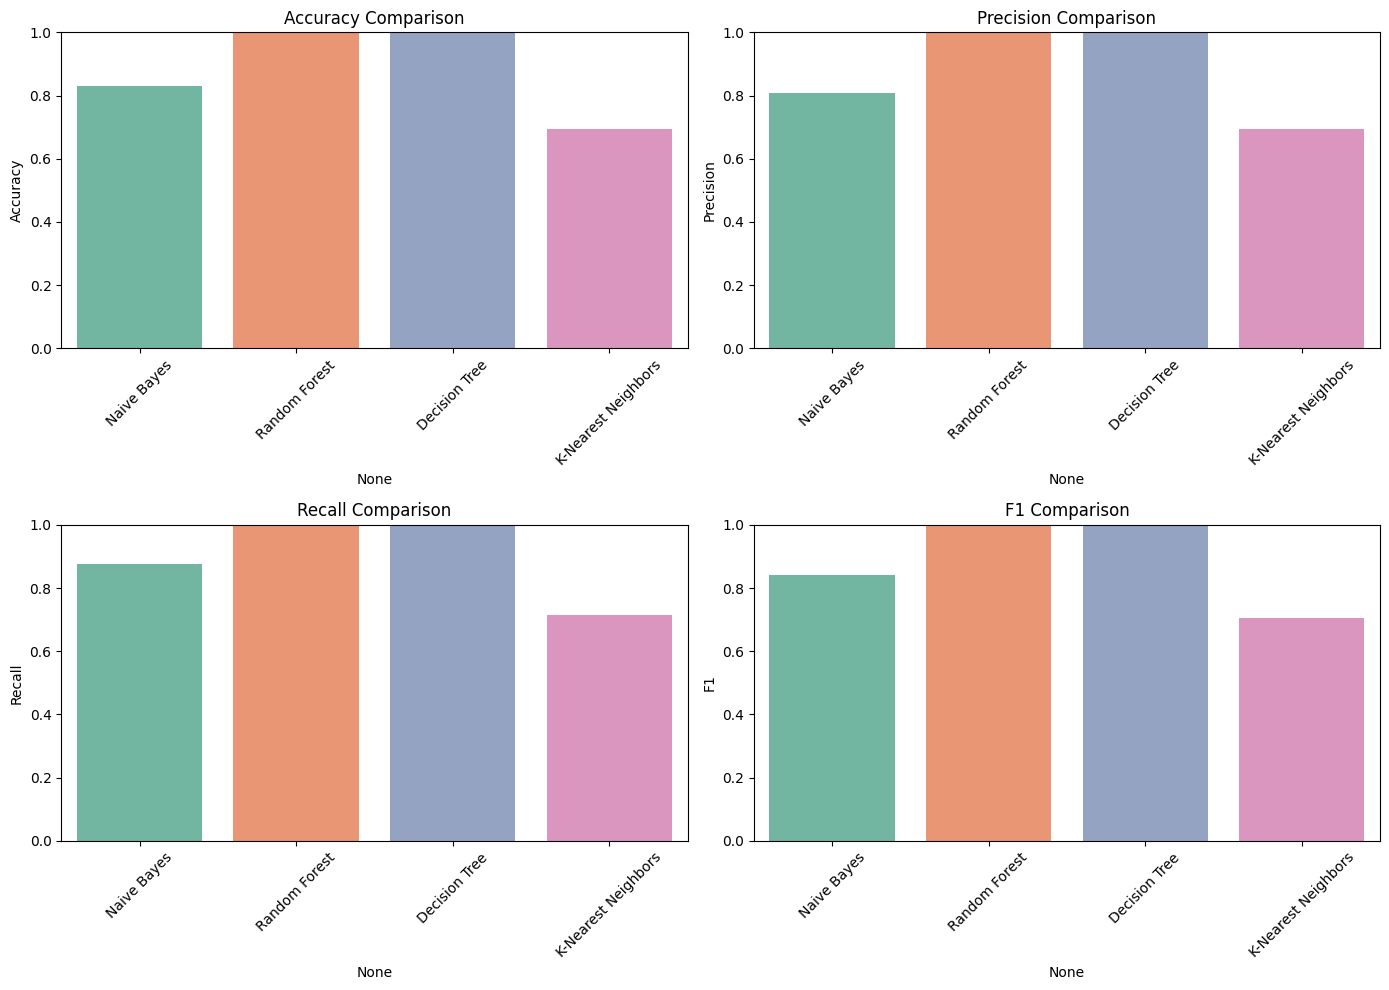

                     accuracy  precision    recall        f1
Naive Bayes          0.829268   0.807018  0.876190  0.840183
Random Forest        1.000000   1.000000  1.000000  1.000000
Decision Tree        1.000000   1.000000  1.000000  1.000000
K-Nearest Neighbors  0.692683   0.694444  0.714286  0.704225


In [13]:
# Plotting the comparison of metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics):
    ax = axes[i//2][i%2]
    sns.barplot(x=results_df.index, y=results_df[metric], ax=ax, palette="Set2")
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_ylabel(metric.capitalize())
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print final metrics table
print(results_df)

# MLflow Tracking

In [14]:
!ngrok config add-authtoken 2x7eWOcvJ8VRm7Ruza5WuRQuEFd_7MZMg9tP1RWP6ZpeGwLs3

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [15]:
# Set an experiment name (optional)
mlflow.set_experiment("Heart Disease ML Experiment")

2025/05/18 06:56:03 INFO mlflow.tracking.fluent: Experiment with name 'Heart Disease ML Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/793310460238342025', creation_time=1747551363058, experiment_id='793310460238342025', last_update_time=1747551363058, lifecycle_stage='active', name='Heart Disease ML Experiment', tags={}>

In [16]:
# Start MLflow server in background
get_ipython().system_raw("mlflow ui --port 5000 &")

In [17]:
# Connect ngrok to the MLflow server

public_url = ngrok.connect(5000)
print("MLflow UI is live at:", public_url)

MLflow UI is live at: NgrokTunnel: "https://a087-35-199-39-99.ngrok-free.app" -> "http://localhost:5000"


In [18]:
with mlflow.start_run(run_name="K-Nearest Neighbors"):
    knn_model = KNeighborsClassifier(n_neighbors=7)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)

    acc = accuracy_score(y_test, knn_pred)
    prec = precision_score(y_test, knn_pred)
    rec = recall_score(y_test, knn_pred)
    f1 = f1_score(y_test, knn_pred)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(knn_model, "knn_model")

    results["K-Nearest Neighbors"] = {
        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1
    }

2025/05/18 06:56:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [19]:
with mlflow.start_run(run_name="Naive Bayes"):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    nb_pred = nb_model.predict(X_test)

    acc = accuracy_score(y_test, nb_pred)
    prec = precision_score(y_test, nb_pred)
    rec = recall_score(y_test, nb_pred)
    f1 = f1_score(y_test, nb_pred)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(nb_model, "naive_bayes_model")

    results["Naive Bayes"] = {
        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1
    }

2025/05/18 06:57:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [22]:
with mlflow.start_run(run_name="Decision Tree"):
    dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)

    acc = accuracy_score(y_test, dt_pred)
    prec = precision_score(y_test, dt_pred)
    rec = recall_score(y_test, dt_pred)
    f1 = f1_score(y_test, dt_pred)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.sklearn.log_model(dt_model, "decision_tree_model")

    results["Decision Tree"] = {
        'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1
    }

2025/05/18 07:00:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [20]:
with mlflow.start_run(run_name="Random Forest"):
    rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    acc = accuracy_score(y_test, rf_pred)
    prec = precision_score(y_test, rf_pred)
    rec = recall_score(y_test, rf_pred)
    f1 = f1_score(y_test, rf_pred)

    # Log parameters
    mlflow.log_param("n_estimators", 50)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)

    # Log model
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    results["Random Forest"] = {
        "accuracy": acc, "precision": prec, "recall": rec, "f1": f1
    }


2025/05/18 06:57:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# Comparative Analysis with Research paper

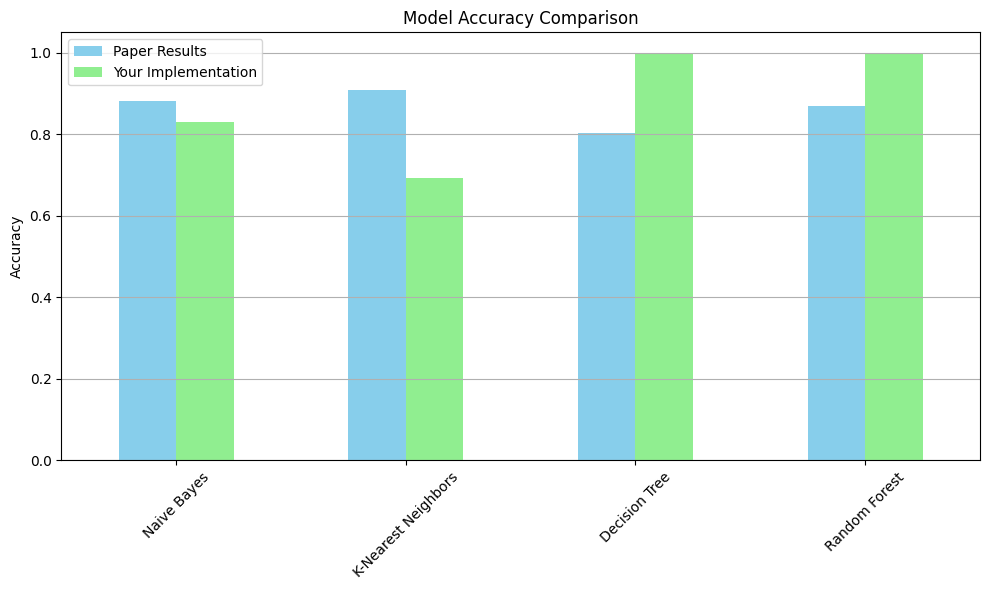

In [21]:
# Paper Results
paper_accuracy = pd.Series({
    'Naive Bayes': 0.88157,
    'K-Nearest Neighbors': 0.90789,
    'Decision Tree': 0.80263,
    'Random Forest': 0.8684
})

# Your Implementation Results
your_accuracy = pd.Series({
    'Naive Bayes': 0.829268,
    'K-Nearest Neighbors': 0.692683,
    'Decision Tree': 1.000000,
    'Random Forest': 1.000000
})

# Combine into DataFrame for plotting
accuracy_comparison = pd.DataFrame({
    'Paper Results': paper_accuracy,
    'Your Implementation': your_accuracy
})

# Plot
ax = accuracy_comparison.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
ax.set_title('Model Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0, 1.05)
ax.grid(axis='y')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Detail Discussion
In comparing my implementation with the results reported in the selected research paper, I observed several key differences in model performance, particularly in terms of accuracy. In my implementation, the Decision Tree and Random Forest classifiers achieved 100% accuracy, whereas the paper reported only 80.26% and 86.84% respectively. For Naive Bayes, my model attained 82.93% accuracy compared to the paper’s 88.15%. However, K-Nearest Neighbors performed lower in my case, with an accuracy of 69.27%, while the paper reported a much higher 90.78%. These differences may be due to methodological factors such as consistent use of a fixed random seed, better handling of preprocessing steps like standardization, and more stable training procedures in my implementation. In contrast, the paper does not clearly mention the use of fixed random seeds or detailed preprocessing strategies. Moreover, the high training accuracy observed in both Decision Tree and Random Forest suggests potential overfitting, which might also have been a factor in the paper’s results, especially since it does not reference techniques like cross-validation or validation sets.